## 6.01 - Supervised Learning Model Comparison

Recall the "data science process."

1. Define the problem.
2. Gather the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we're going to focus mostly on creating (and then comparing) many regression and classification models. Thus, we'll define the problem and gather the data for you.
Most of the questions requiring a written response can be written in 2-3 sentences.

### Step 1: Define the problem.

You are a data scientist with a financial services company. Specifically, you want to leverage data in order to identify potential customers.

If you are unfamiliar with "401(k)s" or "IRAs," these are two types of retirement accounts. Very broadly speaking:
- You can put money for retirement into both of these accounts.
- The money in these accounts gets invested and hopefully has a lot more money in it when you retire.
- These are a little different from regular bank accounts in that there are certain tax benefits to these accounts. Also, employers frequently match money that you put into a 401k.
- If you want to learn more about them, check out [this site](https://www.nerdwallet.com/article/ira-vs-401k-retirement-accounts).

We will tackle one regression problem and one classification problem today.
- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

Check out the data dictionary [here](http://fmwww.bc.edu/ec-p/data/wooldridge2k/401KSUBS.DES).

### NOTE: When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable. When predicting `e401k`, you may use the entire dataframe if you wish.

### Step 2: Gather the data.

##### 1. Read in the data from the repository.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./401ksubs.csv')
df.head(3)

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936


In [3]:
df.info()
# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9275 entries, 0 to 9274
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   e401k   9275 non-null   int64  
 1   inc     9275 non-null   float64
 2   marr    9275 non-null   int64  
 3   male    9275 non-null   int64  
 4   age     9275 non-null   int64  
 5   fsize   9275 non-null   int64  
 6   nettfa  9275 non-null   float64
 7   p401k   9275 non-null   int64  
 8   pira    9275 non-null   int64  
 9   incsq   9275 non-null   float64
 10  agesq   9275 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 797.2 KB


In [4]:
df.describe()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
count,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000
mean,0.392129,39.254641,0.628571,0.204420,41.080216,2.885067,19.071675,0.276226,0.254340,2121.192483,1793.652722
std,0.488252,24.090002,0.483213,0.403299,10.299517,1.525835,63.963838,0.447154,0.435513,3001.469424,895.648841
min,0.000000,10.008000,0.000000,0.000000,25.000000,1.000000,-502.302000,0.000000,0.000000,100.160100,625.000000
25%,0.000000,21.660000,0.000000,0.000000,33.000000,2.000000,-0.500000,0.000000,0.000000,469.155600,1089.000000
50%,0.000000,33.288000,1.000000,0.000000,40.000000,3.000000,2.000000,0.000000,0.000000,1108.091000,1600.000000
75%,1.000000,50.160000,1.000000,0.000000,48.000000,4.000000,18.449500,1.000000,1.000000,2516.025500,2304.000000
max,1.000000,199.041000,1.000000,1.000000,64.000000,13.000000,1536.798000,1.000000,1.000000,39617.320000,4096.000000


##### 2. What are 2-3 other variables that, if available, would be helpful to have?

##### Answer:

Other variables that may influence customers to purchase a new investment product are:
* disposible income 
* already have other investment products 
* property value
* shopping habits (saver or spender), 
* whether have monthly saving habit

##### 3. Suppose a peer recommended putting `race` into your model in order to better predict who to target when advertising IRAs and 401(k)s. Why would this be an unethical decision?

##### Answer:
Because that would be discriminating based on race, which is a sensitive issue

## Step 3: Explore the data.

##### 4. When attempting to predict income, which feature(s) would we reasonably not use? Why?

##### Answer:

Features such as `e401k`, `p401k`, `pira` would not be used because they are outcomes of having an income, would not be realistic contributing factors to **income**.

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

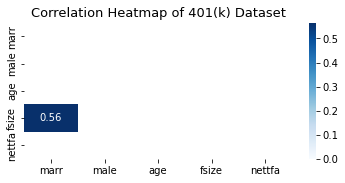

In [41]:
# multicollinearity check

plt.figure(figsize = (6,2.5))

# Get correlation of variables.
corr_df = df.drop(columns=['e401k','p401k','pira','incsq','inc','agesq']).corr()
corr = corr_df[abs(corr_df)>=.5] # show only correlations greater than .5

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, 
            cmap='Blues', 
            mask=mask, 
            annot = True,
            vmin=0
           )
plt.title('Correlation Heatmap of 401(k) Dataset', fontsize=13);

In [45]:
corr_mat = df.drop(columns=['e401k','p401k','pira','incsq','agesq']).corr().inc.sort_values(ascending=False)
corr_mat.head(10)

inc       1.000000
nettfa    0.376586
marr      0.362008
fsize     0.110170
age       0.105638
male     -0.069871
Name: inc, dtype: float64

There are no strong correlating factors that predicts income.

##### 5. What two variables have already been created for us through feature engineering? Come up with a hypothesis as to why subject-matter experts may have done this.
> This need not be a "statistical hypothesis." Just brainstorm why SMEs might have done this!

##### Answer:
The 2 variables that have been created through feature engineering are polynomial features of `income` and `age`. 

Subject-matter experts on identifying potential customers for investment products might have believed that income and age are highly correlated with interest and buying potential of investment products

##### 6. Looking at the data dictionary, one variable description appears to be an error. What is this error, and what do you think the correct value would be?

##### Answer:
There are 2 variable descriptions that appear to have errors. They are `inc` and `age`. They share the same labels as their polynomial of 2 degree counterparts. 

Correct values should be `income` and `age` respectively.

## Step 4: Model the data. (Part 1: Regression Problem)

Recall:
- Problem: What features best predict one's income?
- When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable.

##### 7. List all modeling tactics we've learned that could be used to solve a regression problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific regression problem and explain why or why not.

##### Answer:

Regression models that I have learnt are:
1. Linear models - Linear regression, Ridge regression, Lasso regression, ElasticNet regression
<details>This is appropriate for our problem because the coefficients can be elicited and the predictions are continuous values </details>
1. Random Forest regressor 
<details>This is not appropriate because the coefficients are not easy to understand.</details>
1. Generalised linear models e.g Poisson regression, Gamma regression
<details>This is not appropriate because for Poisson, it predicts discrete $Y$ variable, while Gamma is more appropriate for waiting time predictions.

##### 8. Regardless of your answer to number 7, fit at least one of each of the following models to attempt to solve the regression problem above:
    - a multiple linear regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    - a support vector regressor
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend setting a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

##### Regression: What features best predict one's income?

In [5]:
# define X and y
X = df.drop(columns=['e401k','p401k','pira','inc','incsq'])
y = df['inc']

In [6]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, #9275 obs
                                                    random_state=42)

In [8]:
print('X_train shape:' , X_train.shape)
print('y_train shape:', y_train.shape)

X_train shape: (6492, 6)
y_train shape: (6492,)


In [10]:
# initiate pipeline to test multiple models
# built-in min max scaler
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline

# import minmaxscaler
from sklearn.preprocessing import MinMaxScaler # chosen for feature interaction explainability

# import models
from sklearn.linear_model import ElasticNet # no CV because will be done by GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor # for bagging decision trees
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import SGDRegressor # to use in adaboost
from sklearn.svm import SVR

##### Instantiate Pipelines and GridSearchCV
[GridSearch + Pipeline multiple models reference](https://ryan-reilly.medium.com/gridsearch-pipelines-of-multiple-models-on-multiclass-classification-e9124b6ea2e3)

In [11]:
# construct pipelines
enet_pipe = Pipeline([
    ('mms', MinMaxScaler()),
    ('enet', ElasticNet())
])

knr_pipe = Pipeline([
    ('mms', MinMaxScaler()),
    ('knr', KNeighborsRegressor())
])

dt_pipe = Pipeline([
    ('mms', MinMaxScaler()),
    ('dtr', DecisionTreeRegressor())
])

bag_pipe = Pipeline([
    ('mms', MinMaxScaler()),
    ('bag', BaggingRegressor()) # check if default is decision trees
])

rf_pipe = Pipeline([
    ('mms', MinMaxScaler()),
    ('rf', RandomForestRegressor())
])

abr_pipe = Pipeline([
    ('mms', MinMaxScaler()),
    ('abr', AdaBoostRegressor())
])

svr_pipe = Pipeline([
    ('mms', MinMaxScaler()),
    ('svr', SVR())
])

In [21]:
# define pipeline parameters
seeds=[1,2,3]

enet_params = [{
    'enet__alpha':[.5,.7,1.],
    'enet__l1_ratio':[.5,.7,.9]
}]

knr_params = [{
    'knr__n_neighbors':[3,5,9],
    'knr__weights':['uniform','distance']
}]

dt_params = [{
    'dtr__random_state':seeds,
    'dtr__splitter':['random','best'],
    'dtr__max_depth':[None,3,5]
}]

bag_params = [{
    'bag__random_state':seeds,
    'bag__n_estimators':[5,10]
}]

rf_params = [{
    'rf__random_state':seeds,
    'rf__n_estimators':[100,150,200],
    'rf__max_depth':[None,3,5]
}]

abr_params = [{
    'abr__base_estimator':[SGDRegressor()],
    'abr__learning_rate':[.5,1.],
    'abr__random_state':seeds,
    'abr__loss':['linear','square','exponential']
}]

svr_params = [{
    'svr__C':[1.,10.,100.],
    'svr__max_iter':[20_000,40_000]
}]

In [22]:
enet_gs = GridSearchCV(enet_pipe,
                       enet_params,
                       scoring='neg_root_mean_squared_error',
                       cv=5,
                       verbose=1)

knr_gs = GridSearchCV(knr_pipe,
                      knr_params,
                      scoring='neg_root_mean_squared_error',
                      cv=5,
                      verbose=1)

dt_gs = GridSearchCV(dt_pipe,
                     dt_params,
                     scoring='neg_root_mean_squared_error',
                     cv=5,
                     verbose=1)

bag_gs = GridSearchCV(bag_pipe,
                      bag_params,
                      scoring='neg_root_mean_squared_error',
                      cv=5,
                      verbose=1)

rf_gs = GridSearchCV(rf_pipe,
                     rf_params,
                     scoring='neg_root_mean_squared_error',
                     cv=5,
                     verbose=1)

abr_gs = GridSearchCV(abr_pipe,
                      abr_params,
                      scoring='neg_root_mean_squared_error',
                      cv=5,
                      verbose=1)

svr_gs = GridSearchCV(svr_pipe,
                      svr_params,
                      scoring='neg_root_mean_squared_error',
                      cv=5,
                      verbose=2)

In [23]:
%%time

import time
named_tuple = time.localtime() # get start_time
time_string = time.strftime("%d/%m/%Y, %H:%M", named_tuple) # format time print
print(f'start time: {time_string}')

# fit models
grids = [enet_gs, knr_gs, dt_gs, bag_gs, rf_gs, abr_gs, svr_gs]
for pipe in grids:
    pipe.fit(X_train, y_train)

start time: 02/08/2022, 14:57
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 17min 45s
Wall time: 7min 16s


In [24]:
from sklearn.metrics import mean_squared_error

y_bar = np.repeat(np.mean(y_train),(len(y_train)))
y_bar_rmse = mean_squared_error(y_train, y_bar, squared=False)

grid_dict = {0: 'Elastic Net', 1: 'K-Neighbors',
            2: 'Decision Tree', 3: 'Bagged Decision Trees',
            4: 'Random Forest', 5: 'AdaBoost',
            6: 'Support Vector regressor'}

for i, model in enumerate(grids):
    print(f'y_bar rmse: {y_bar_rmse}')
    print(f'{grid_dict[i]} train rmse: {model.score(X_train, y_train)}')
    print(f'{grid_dict[i]} test rmse: {model.score(X_test, y_test)}')
    print(f'{grid_dict[i]} %_diff rmse: {((model.score(X_train, y_train)-model.score(X_test, y_test))*100)/model.score(X_train, y_train)} %')
    print(f'{grid_dict[i]} Best Params: {model.best_params_}')
    print()

y_bar rmse: 23.87504286627291
Elastic Net train rmse: -22.30602858487258
Elastic Net test rmse: -23.08709162981089
Elastic Net %_diff rmse: -3.501578248079575 %
Elastic Net Best Params: {'enet__alpha': 0.5, 'enet__l1_ratio': 0.9}

y_bar rmse: 23.87504286627291
K-Neighbors train rmse: -17.976878251026275
K-Neighbors test rmse: -20.70924699598627
K-Neighbors %_diff rmse: -15.199350559121733 %
K-Neighbors Best Params: {'knr__n_neighbors': 9, 'knr__weights': 'uniform'}

y_bar rmse: 23.87504286627291
Decision Tree train rmse: -18.12669591446635
Decision Tree test rmse: -19.428925746939772
Decision Tree %_diff rmse: -7.184044122647599 %
Decision Tree Best Params: {'dtr__max_depth': 5, 'dtr__random_state': 1, 'dtr__splitter': 'best'}

y_bar rmse: 23.87504286627291
Bagged Decision Trees train rmse: -8.77753858636459
Bagged Decision Trees test rmse: -21.079412501068443
Bagged Decision Trees %_diff rmse: -140.15174976062332 %
Bagged Decision Trees Best Params: {'bag__n_estimators': 10, 'bag__ran

All of my models currently have poor performance, not significantly better than baseline model. The best performing one (`Random Forest regressor`) is overfitted. I would need to do more hyperparameter tuning, maybe reduce features to reduce noise, do polynomial feature engineering of the more stronger correlating features such as `marr` or `nettfa`, maybe get data of other features not yet considered in this dataset.

Based on `Random Forest regressor`, I will attempt to distill the predictive features for one's income.

[Pipeline object attribute distillation](https://stackoverflow.com/questions/69945795/scikit-learn-gridsearchcv-with-pipeline-as-estimator-how-to-get-the-attributes)

In [50]:
importances = rf_gs.best_estimator_.named_steps['rf'].feature_importances_
importances

array([0.2303284 , 0.0068539 , 0.0231272 , 0.00379621, 0.71184085,
       0.02405346])

In [51]:
order_of_import = np.argsort(importances)[::-1]

In [52]:
def barh(title, y, x, dec, limit):  
    fig, ax = plt.subplots() 
    plt.title(f'{title} Feature Importance', fontsize=13) # title

    hbars = plt.barh(y=y[::-1], # to arrange highest to lowest
                 width=x[::-1], # to arrange highest to lowest
                 align='center')

    ax.bar_label(hbars, fmt=dec, padding=2) # annotate each horizontal bar as subplot
    plt.xlim([0, limit]) # expand figure to fit annotations
    plt.xticks(rotation=45);

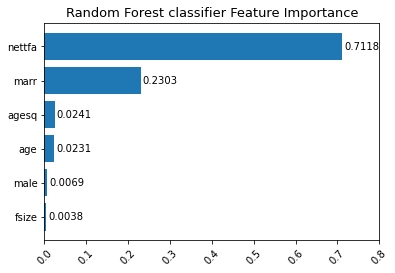

In [53]:
barh(title='Random Forest classifier', 
     y=X_train.columns[order_of_import],
     x=importances[order_of_import],
     dec='%.4f',
     limit=0.8)

The `Random Forest Classifier` also agrees that `nettfa` and `marr` are the 2 most important features for predicting income. `nettfa` more so than `marr`. 

##### 9. What is bootstrapping?

##### Answer:

The bootstrap method is a resampling technique used to estimate statistics on a population by sampling a dataset with replacement.

[Reference](https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/)

##### 10. What is the difference between a decision tree and a set of bagged decision trees? Be specific and precise!

##### Answer:

decision tree is a single machine learning estimator

while bagged decision trees means bootstrapping the dataset to generate multiple random subsets, and fitting a decision tree for each subset to generate models of variable performance. then using averaging or voting of each model predictions to give final prediction. 

##### 11. What is the difference between a set of bagged decision trees and a random forest? Be specific and precise!

##### Answer:

Bagging is an ensemble algorithm that fits multiple models on different subsets of a training dataset, then combines the predictions from all models.

Random forest is an extension of bagging that also randomly selects **subsets of features** used in each data sample.

##### 12. Why might a random forest be superior to a set of bagged decision trees?
> Hint: Consider the bias-variance tradeoff.

##### Answer:

Random forests are usually superior to bagged decision trees, as, not only is bagging occurring, but random selection of a subset of features at every node is occurring, and, in practice, this reduces the correlation between trees, which improves the effectiveness of the final averaging step.

[Reference](https://stats.stackexchange.com/questions/365437/what-are-advantages-of-random-forests-vs-using-bagging-with-other-classifiers#:~:text=Random%20forests%20are%20actually%20usually,of%20the%20final%20averaging%20step.)

## Step 5: Evaluate the model. (Part 1: Regression Problem)

##### 13. Using RMSE, evaluate each of the models you fit on both the training and testing data.

In [24]:
from sklearn.metrics import mean_squared_error

y_bar = np.repeat(np.mean(y_train),(len(y_train)))
y_bar_rmse = mean_squared_error(y_train, y_bar, squared=False)

grid_dict = {0: 'Elastic Net', 1: 'K-Neighbors',
            2: 'Decision Tree', 3: 'Bagged Decision Trees',
            4: 'Random Forest', 5: 'AdaBoost',
            6: 'Support Vector regressor'}

for i, model in enumerate(grids):
    print(f'y_bar rmse: {y_bar_rmse}')
    print(f'{grid_dict[i]} train rmse: {model.score(X_train, y_train)}')
    print(f'{grid_dict[i]} test rmse: {model.score(X_test, y_test)}')
    print(f'{grid_dict[i]} %_diff rmse: {((model.score(X_train, y_train)-model.score(X_test, y_test))*100)/model.score(X_train, y_train)} %')
    print(f'{grid_dict[i]} Best Params: {model.best_params_}')
    print()

y_bar rmse: 23.87504286627291
Elastic Net train rmse: -22.30602858487258
Elastic Net test rmse: -23.08709162981089
Elastic Net %_diff rmse: -3.501578248079575 %
Elastic Net Best Params: {'enet__alpha': 0.5, 'enet__l1_ratio': 0.9}

y_bar rmse: 23.87504286627291
K-Neighbors train rmse: -17.976878251026275
K-Neighbors test rmse: -20.70924699598627
K-Neighbors %_diff rmse: -15.199350559121733 %
K-Neighbors Best Params: {'knr__n_neighbors': 9, 'knr__weights': 'uniform'}

y_bar rmse: 23.87504286627291
Decision Tree train rmse: -18.12669591446635
Decision Tree test rmse: -19.428925746939772
Decision Tree %_diff rmse: -7.184044122647599 %
Decision Tree Best Params: {'dtr__max_depth': 5, 'dtr__random_state': 1, 'dtr__splitter': 'best'}

y_bar rmse: 23.87504286627291
Bagged Decision Trees train rmse: -8.77753858636459
Bagged Decision Trees test rmse: -21.079412501068443
Bagged Decision Trees %_diff rmse: -140.15174976062332 %
Bagged Decision Trees Best Params: {'bag__n_estimators': 10, 'bag__ran

All of my models currently have poor performance, not significantly better than baseline model. The best performing one (`Random Forest regressor`) is overfitted. I would need to do more hyperparameter tuning, maybe reduce features to reduce noise, do polynomial feature engineering of the more stronger correlating features such as `marr` or `nettfa`, maybe get data of other features not yet considered in this dataset.

##### 14. Based on training RMSE and testing RMSE, is there evidence of overfitting in any of your models? Which ones?

##### Answers:

There is overfitting in `K-Neighbors`, `Decision Tree`, `Bagged Decision Trees`, `Random Forest` and `SVR` models. 

##### 15. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

I picked `Random Forest` despite overfitting because it has the best test RMSE score out of the other models. 

##### 16. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

I would need to do more hyperparameter tuning, maybe reduce features to reduce noise, do polynomial feature engineering of the more stronger correlating features such as `marr` or `nettfa`, maybe get data of other features not yet considered in this dataset. Try other models. 

## Step 4: Model the data. (Part 2: Classification Problem)

Recall:
- Problem: Predict whether or not one is eligible for a 401k.
- When predicting `e401k`, you may use the entire dataframe if you wish.

##### 17. While you're allowed to use every variable in your dataframe, mention at least one disadvantage of using `p401k` in your model.

##### Answer:

Not sure.

##### 18. List all modeling tactics we've learned that could be used to solve a classification problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific classification problem and explain why or why not.

##### Answer:

1. Logistic regression
1. Naive Bayes 
1. K-Nearest Neighbors
1. Decision trees
1. Random Forest
1. Support Vector machines

Unable to identify why any of the techniques above is not suitable for solving this specific classification problem. 

##### 19. Regardless of your answer to number 18, fit at least one of each of the following models to attempt to solve the classification problem above:
    - a logistic regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    - a support vector classifier
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend using a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [131]:
# define X and y
X = df.drop(columns=['e401k','p401k','agesq','incsq'])
y = df['e401k']

In [132]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, #9275 obs
                                                    stratify=y,
                                                    random_state=42)

In [133]:
print('X_train shape:' , X_train.shape)
print('y_train shape:', y_train.shape)

X_train shape: (6492, 7)
y_train shape: (6492,)


In [134]:
display('y_train:', y_train.value_counts())
display('y_test:', y_test.value_counts())

'y_train:'

0    3946
1    2546
Name: e401k, dtype: int64

'y_test:'

0    1692
1    1091
Name: e401k, dtype: int64

There is some imbalance in target variable `e401k`.

In [113]:
# import models
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier # for bagging decision trees
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB # to use in adaboost
from sklearn.svm import SVC

##### Instantiate Pipelines and GridSearchCV
[GridSearch + Pipeline multiple models reference](https://ryan-reilly.medium.com/gridsearch-pipelines-of-multiple-models-on-multiclass-classification-e9124b6ea2e3)

In [124]:
# construct pipelines
logr_pipe = Pipeline([
    ('mms', MinMaxScaler()),
    ('logr', LogisticRegression())
])

knc_pipe = Pipeline([
    ('mms', MinMaxScaler()),
    ('knc', KNeighborsClassifier())
])

dtc_pipe = Pipeline([
    ('mms', MinMaxScaler()),
    ('dtc', DecisionTreeClassifier())
])

bagc_pipe = Pipeline([
    ('mms', MinMaxScaler()),
    ('bagc', BaggingClassifier()) # check if default is decision trees
])

rfc_pipe = Pipeline([
    ('mms', MinMaxScaler()),
    ('rfc', RandomForestClassifier())
])

abc_pipe = Pipeline([
    ('mms', MinMaxScaler()),
    ('abc', AdaBoostClassifier()) # use with Extra Trees
])

svc_pipe = Pipeline([
    ('mms', MinMaxScaler()),
    ('svc', SVC())
])

In [125]:
# define pipeline parameters
seeds=[1,2,3]

logr_params = [{
    'logr__class_weight':['balanced', {1:1.24, 0:0.8}],
    'logr__solver':['liblinear', 'saga'],
    'logr__penalty': ['l1','l2'],
    'logr__C': [.1, .5, 1.],
    'logr__random_state': seeds
    #'logr__max_iter':[1_000, 5_000] # default=100
}]

knc_params = [{
    'knc__n_neighbors':[3,5,9],
    'knc__weights':['uniform','distance']
}]

dtc_params = [{
    'dtc__random_state':seeds,
    'dtc__splitter':['random','best'],
    'dtc__max_depth':[None,3,5]
}]

bagc_params = [{
    'bagc__random_state':seeds,
    'bagc__n_estimators':[5,10]
}]

rfc_params = [{
    'rfc__random_state':seeds,
    'rfc__n_estimators':[100,150,200],
    'rfc__max_depth':[None,3,5]
}]

abc_params = [{
    'abc__base_estimator':[MultinomialNB()],
    'abc__learning_rate':[1.,2.],
    'abc__random_state':seeds
}]

svc_params = [{
    'svc__C':[.01,.1,.5],
    'svc__max_iter':[80_000, 100_000],
    'svc__probability':[True],
    'svc__random_state':seeds
}]

# cannot use standard scaler due to presence of negative values, 
# multinomialNB cannot accept negative values

In [126]:
score = 'accuracy'

logr_gs = GridSearchCV(logr_pipe,
                       logr_params,
                       scoring=score,
                       cv=5,
                       verbose=1)

knc_gs = GridSearchCV(knc_pipe,
                      knc_params,
                      scoring=score,
                      cv=5,
                      verbose=1)

dtc_gs = GridSearchCV(dtc_pipe,
                      dtc_params,
                      scoring=score,
                      cv=5,
                      verbose=1)

bagc_gs = GridSearchCV(bagc_pipe,
                       bagc_params,
                       scoring=score,
                       cv=5,
                       verbose=1)

rfc_gs = GridSearchCV(rfc_pipe,
                      rfc_params,
                      scoring=score,
                      cv=5,
                      verbose=1)

abc_gs = GridSearchCV(abc_pipe,
                      abc_params,
                      scoring=score,
                      cv=5,
                      verbose=1)

svc_gs = GridSearchCV(svc_pipe,
                      svc_params,
                      scoring=score,
                      cv=5,
                      verbose=1)

In [135]:
%%time

import time
named_tuple = time.localtime() # get start_time
time_string = time.strftime("%d/%m/%Y, %H:%M", named_tuple) # format time print
print(f'start time: {time_string}')

# fit models
grids = [logr_gs, knc_gs, dtc_gs, bagc_gs, rfc_gs, abc_gs, svc_gs]
for pipe in grids:
    pipe.fit(X_train, y_train)

start time: 04/08/2022, 14:45
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: total: 14min 15s
Wall time: 13min 55s


In [104]:
from sklearn.metrics import (confusion_matrix, roc_auc_score, accuracy_score, 
                             recall_score, precision_score, f1_score)

In [136]:
baseline = 3946/(2546+3946) # majority class is '0'

grid_dict = {0: 'Elastic Net', 1: 'K-Neighbors',
            2: 'Decision Tree', 3: 'Bagged Decision Trees',
            4: 'Random Forest', 5: 'AdaBoost',
            6: 'Support Vector regressor'}

for i, model in enumerate(grids):
    preds = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    print(f'baseline accuracy: {baseline}')
    print(f'{grid_dict[i]} confusion matrix: \n {confusion_matrix(y_test, preds)}')
    print(f'{grid_dict[i]} train accuracy: {model.score(X_train,y_train):.3f}')
    print(f'{grid_dict[i]} test accuracy: {model.score(X_test,y_test):.3f}') # accuracy score
    print(f'{grid_dict[i]} precision: {precision_score(y_test, preds):.3f}') #(tp / (tp + fp))
    print(f'{grid_dict[i]} recall: {recall_score(y_test, preds):.3f}') # sensitivity (tp / (tp + fn))
    print(f'{grid_dict[i]} f1 score: {f1_score(y_test, preds):.3f}') # aim precision = recall
    print(f'{grid_dict[i]} specificity: {(tn / (tn + fp)):.3f}')
    print(f'{grid_dict[i]} ROC AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:,1]):.3f}')
    print(f'{grid_dict[i]} accuracy generalisation: {(((model.score(X_train,y_train)-model.score(X_test,y_test))*100)/model.score(X_train,y_train)):.3f} %')
    print(f'{grid_dict[i]} Best Params: {model.best_params_}')
    print()

baseline accuracy: 0.6078250154035736
Elastic Net confusion matrix: 
 [[1220  472]
 [ 502  589]]
Elastic Net train accuracy: 0.646
Elastic Net test accuracy: 0.650
Elastic Net precision: 0.555
Elastic Net recall: 0.540
Elastic Net f1 score: 0.547
Elastic Net specificity: 0.721
Elastic Net ROC AUC: 0.693
Elastic Net accuracy generalisation: -0.594 %
Elastic Net Best Params: {'logr__C': 1.0, 'logr__class_weight': 'balanced', 'logr__penalty': 'l1', 'logr__random_state': 1, 'logr__solver': 'saga'}

baseline accuracy: 0.6078250154035736
K-Neighbors confusion matrix: 
 [[1296  396]
 [ 643  448]]
K-Neighbors train accuracy: 0.717
K-Neighbors test accuracy: 0.627
K-Neighbors precision: 0.531
K-Neighbors recall: 0.411
K-Neighbors f1 score: 0.463
K-Neighbors specificity: 0.766
K-Neighbors ROC AUC: 0.624
K-Neighbors accuracy generalisation: 12.660 %
K-Neighbors Best Params: {'knc__n_neighbors': 9, 'knc__weights': 'uniform'}

baseline accuracy: 0.6078250154035736
Decision Tree confusion matrix: 
 

The best classifier based on ROC AUC score is `Random Forest classifier`. It also has good generalisation of 1.309 %.

## Step 5: Evaluate the model. (Part 2: Classfication Problem)

##### 20. Suppose our "positive" class is that someone is eligible for a 401(k). What are our false positives? What are our false negatives?

In [138]:
from sklearn.metrics import ConfusionMatrixDisplay

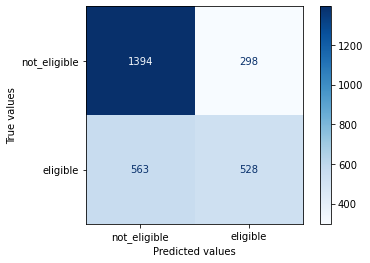

In [142]:
confusion_mat = confusion_matrix(y_test, rfc_gs.predict(X_test))
ConfusionMatrixDisplay(confusion_mat, display_labels=['not_eligible','eligible']).plot(cmap=plt.cm.Blues)
plt.xlabel('Predicted values')
plt.ylabel('True values');    

##### Answer:
**False positives** are values that are predicted as eligible but actually not eligible.

**False negatives** are values that are predicted as not eligible but actually eligible.

##### 21. In this specific case, would we rather minimize false positives or minimize false negatives? Defend your choice.

##### Answer:

For this situation, it is important to ensure that all who are eligible for 401k are flagged, and not missed, because that would be missed business opportunities. 
So this would mean I would rather minimise false negatives.

##### 22. Suppose we wanted to optimize for the answer you provided in problem 21. Which metric would we optimize in this case?

##### Answer:
I would optimise specificity 

##### 23. Suppose that instead of optimizing for the metric in problem 21, we wanted to balance our false positives and false negatives using `f1-score`. Why might [f1-score](https://en.wikipedia.org/wiki/F1_score) be an appropriate metric to use here?

##### Answer: 
f1 score is a weighted average of precision and recall scores. 

Precision measures true positives out of all the predicted positives(includes false positives), and recall measures predicted positives out of all the positives(includes false negatives), so in a way, f1 score can be inferred if false positives and false negatives are balanced.

##### 24. Using f1-score, evaluate each of the models you fit on both the training and testing data.

In [143]:
for i, model in enumerate(grids):
    trn_preds = model.predict(X_train)
    tst_preds = model.predict(X_test)
    print(f'{grid_dict[i]} train f1 score: {f1_score(y_train, trn_preds):.3f}')
    print(f'{grid_dict[i]} test f1 score: {f1_score(y_test, tst_preds):.3f}')
    print()

Elastic Net train f1 score: 0.539
Elastic Net test f1 score: 0.547

K-Neighbors train f1 score: 0.595
K-Neighbors test f1 score: 0.463

Decision Tree train f1 score: 0.605
Decision Tree test f1 score: 0.588

Bagged Decision Trees train f1 score: 0.967
Bagged Decision Trees test f1 score: 0.486

Random Forest train f1 score: 0.565
Random Forest test f1 score: 0.551

AdaBoost train f1 score: 0.191
AdaBoost test f1 score: 0.170

Support Vector regressor train f1 score: 0.363
Support Vector regressor test f1 score: 0.337



##### 25. Based on training f1-score and testing f1-score, is there evidence of overfitting in any of your models? Which ones?

##### Answer:
Based on training f1-score and testing f1-score, there is evidence of overfitting for K-Neighbors, Bagged Decision Trees, AdaBoost models

##### 26. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

I pick `Random Forest classifier` as my final model based on best ROC AUC score among models. It also has good generalisation of 1.309 %.

##### 27. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

##### Answer:

For classification problem, if I had more time, I would 
* explore other models
* explore different feature selection / combinations
* explore feature engineering by feature interaction
* explore new features (get data of new features) that may have more predictive value
* explore hyperparameter fine tuning

## Step 6: Answer the problem.

##### BONUS: Briefly summarize your answers to the regression and classification problems. Be sure to include any limitations or hesitations in your answer.

- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.